In [7]:
library(ggplot2)
library(MASS)
library(tidyverse)

── Attaching packages ─────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1
✔ purrr   0.3.4     

Warning message:
“package ‘tibble’ was built under R version 4.1.1”
Warning message:
“package ‘readr’ was built under R version 4.1.1”
Warning message:
“package ‘stringr’ was built under R version 4.1.1”
Warning message:
“package ‘forcats’ was built under R version 4.1.1”
── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ dplyr::select() masks MASS::select()



### Data

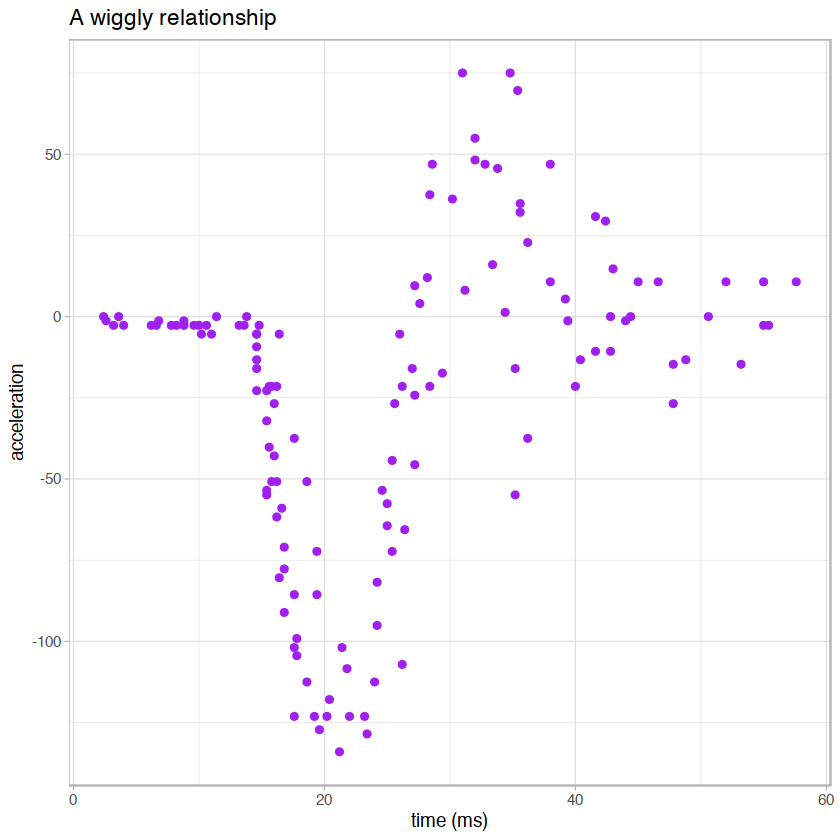

In [11]:
data(mcycle)
p = ggplot(data=mcycle) +
      geom_point(aes(x=times, y=accel), col='purple', size=1.5) +
      xlab('time (ms)') + ylab('acceleration') + ggtitle('A wiggly relationship') +
      theme_light()
p

### Simple linear regression, without higher dimension

In [5]:
f1Basis <- data.frame(y = mcycle$accel, x0 = 1, x1 = mcycle$times)
f1Fitted <- lm(y ~ . -1, data = f1Basis)

In [8]:
f1Predicted <- f1Basis %>% mutate(yhat = fitted(f1Fitted)) %>% arrange(x1)

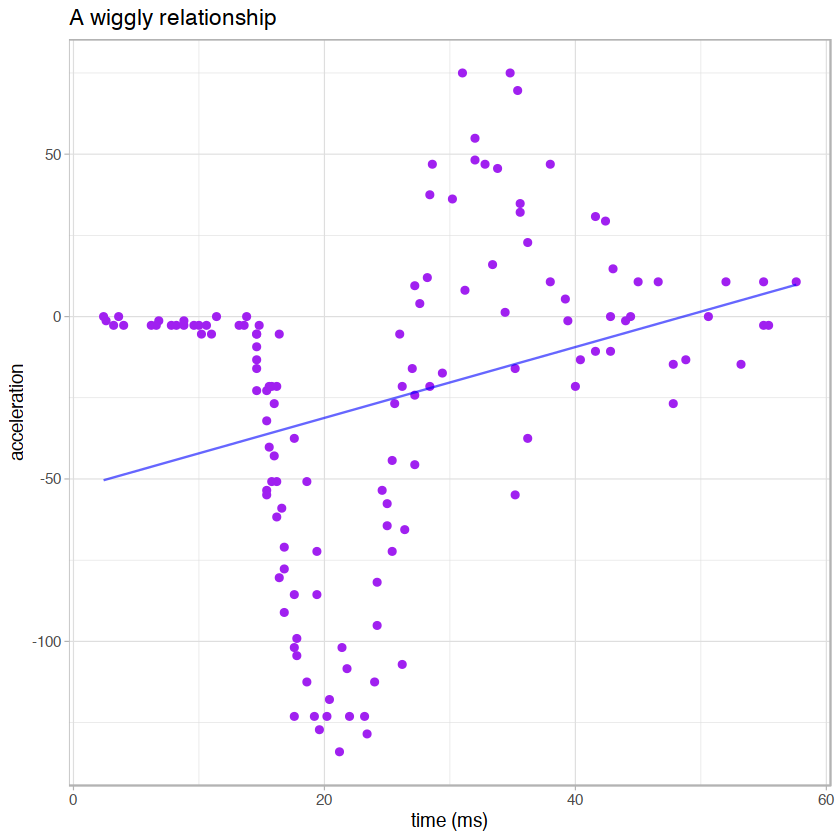

In [12]:
p + geom_line(data = f1Predicted, aes(x1, yhat), col = 'blue', alpha = 0.6)

### Increase the dimension of the features

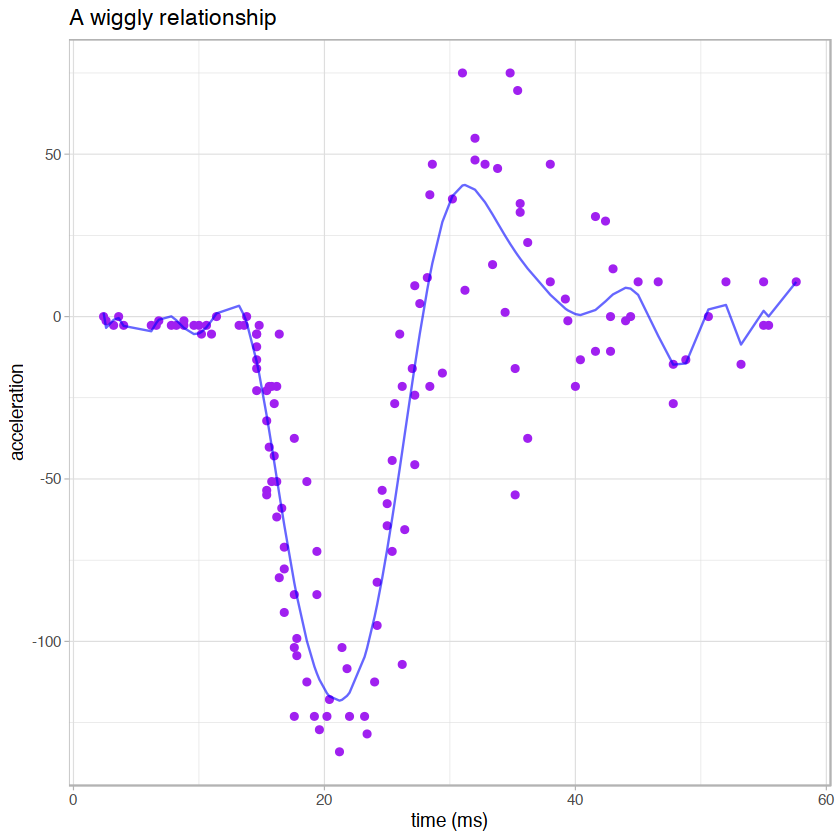

In [13]:
fbigFitted <- lm(accel ~ poly(times, 20), data = mcycle)
  
fbigPredicted <- mcycle %>% mutate(yhat = fitted(fbigFitted)) %>% arrange(times)
  
p + geom_line(data = fbigPredicted, aes(times, yhat), col = 'blue', alpha = 0.6)

### Create polynomials


In [16]:
f4Basis <- cbind(1, poly(mcycle$times, 4, raw = T))

### Create multiple models and pick from them

In [25]:
basisList <- list()

for(i in 1:20) {
    basisList[[i]] <- data.frame(y = mcycle$accel, poly(mcycle$times, degree = i, raw = T))
}
  
modelList <- lapply(basisList, function(q){ lm(y~., data = q) })


In [30]:
summary(modelList[[1]])$adj.r.squared

[1] 0.08089199

In [33]:
adjRsq <- lapply(modelList, function(q){summary(q)$adj.r.squared})

which.max(adjRsq)

[1] 12